# Regressão logística

Apesar do nome, regressão logística é geralmente utilizada como um algoritmo de classificação. De certa forma, pode ser visto como um cálculo da probabilidade de um evento ocorrer ou não, sendo assim geralmente associado a saídas binárias (como prever se um determinado produto vai ser vendido ou não para um cliente, ou se um paciente conseguirá se curar com um determinado tratamento ou não). No entanto, é possível generalizar o modelo para tarefas de classificação não-binária.

Similar à regressão linear, a regressão logística também dá como resultado um coeficiente e uma constante chamada de _intercept_. Esses números não são utilizados para formar uma combinação linear (como uma reta), mas sim na função logística (também chamada de curva sigmóide:

$f(x) = \dfrac{1}{1 + \exp(-(k\cdot (x - x_0)))}$

Onde $\exp(v) = e^v$, a famosa função exponencial com base natural e.

Essa não é a forma geral da função logística, mas é a forma que utilizaremos na regressão logística. Vamos visualizar essa curva com alguns valores diferentes de $k$ e $x_0$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

%matplotlib inline

/home/chinen/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def sigmoide(x, k, x0):
    return 1 / (1 + np.exp(-k * (x - x0)))

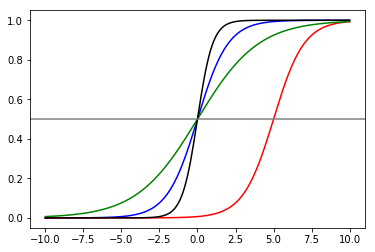

In [3]:
x = np.linspace(-10, 10, 200)
plt.plot(x, sigmoide(x, k=1, x0=0), color='blue')
plt.plot(x, sigmoide(x, k=1, x0=5), color='red')
plt.plot(x, sigmoide(x, k=0.5, x0=0), color='green')
plt.plot(x, sigmoide(x, k=2, x0=0), color='black')
plt.axhline(0.5, color='gray');

Também é possível inverter a curva, calculando a probabilidade do evento não ocorrer. É possível visualizar esse evento tanto calculando a probabilidade complementar $1 - x$ ou negando o valor $k$.

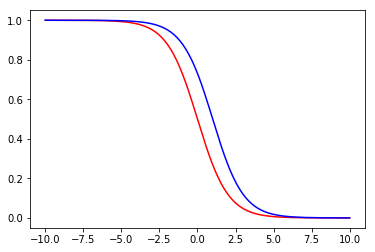

In [4]:
plt.plot(x, 1 - sigmoide(x, k=1, x0=0), color='red')
plt.plot(x, sigmoide(x, k=-1, x0=1), color='blue');

Propriedades importantes da função logística:

- a variável de entrada $x$ toma valores em toda a reta, $-\infty < x < \infty$
- o resultado da função é no intervalo $0 < f(x) < 1$, com os extremos sendo os limites, $\lim_{x\to-\infty} f(x) = 0$ e $\lim_{x\to\infty} f(x) = 1$
- o ponto onde $x = x_0$ é o resultado 0.5, $f(x_0) = 0.5$
- o valor de $k$ determina quão "íngreme" é a curva, com valores maiores de $k$ gerando uma curva mais "vertical"

Na regressão logística, o algoritmo é responsável por encontrar os valores de $k$ e $x_0$ baseado nos dados que fornecemos. Assim, criamos uma função logística que calcula a probabilidade estimada do nosso evento ocorrer, e podemos usar essa função em novos exemplos para determinar se a maior chance é do evento ocorrer ou não.

No entanto, o scikit-learn possui versões mais complexas do método, que utilizam parâmetros de regularização. Assim, não utilizaremos nossa função logística para tentar recriar a curva aproximada, mas sim a versão penalizada do scikit-learn. Para aqueles que usam a regressão logística frequentemente, muitas vezes são utilizadas outras ferramentas como a biblioteca statsmodel ou até mesmo fazendo parte da análise em outra linguagem, como R.

[0.73177998] [-2.07602909]


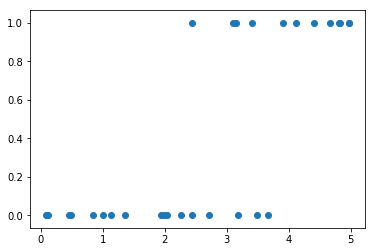

In [5]:
# 30 números aleatórios entre 0 e 5, uniforme
x = np.sort(np.random.rand(30) * 5).reshape(-1, 1)
# 30 números aleatórios utilizando a distribuição normal com sigma = 1 e mu = 0
ruido = np.random.randn(30, 1)
y = ((x + ruido) > 2.5).reshape(-1)

regressor = LogisticRegression().fit(x, y)

print(regressor.coef_[0], regressor.intercept_)
plt.scatter(x, y);

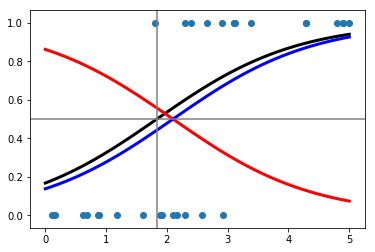

In [12]:
plt.scatter(x, y)
graphx = np.linspace(0, 5, 100).reshape(-1, 1)
plt.plot(graphx, sigmoide(graphx, k=regressor.coef_[0], x0=-regressor.intercept_), c='k', linewidth=3)
plt.plot(graphx, regressor.predict_proba(graphx)[:, 0], c='red', linewidth=3)
plt.plot(graphx, regressor.predict_proba(graphx)[:, 1], c='blue', linewidth=3)
plt.axhline(0.5, c='gray')
plt.axvline(-regressor.intercept_, c='gray');

Utilizando a função `predict` podemos encontrar a qual classe o regressor acha que um ponto pertence (ou no caso, "os pontos", pois a função é vetorizada).

In [13]:
sum(regressor.predict(x) == y) / len(y)

0.8333333333333334

In [14]:
accuracy_score(regressor.predict(x), y)

0.8333333333333334

Utilizando a função `predict_proba`, o regressor retorna a probabilidade de cada classe, segundo o modelo. Se o nosso problema tivesse mais de duas classes, haveriam colunas adicionais.

A função `predict` simplesmente retorna qual das classes possui o maior valor em `predict_proba`.

In [15]:
regressor.predict_proba(x)

array([[0.85131022, 0.14868978],
       [0.84476985, 0.15523015],
       [0.78516876, 0.21483124],
       [0.77373533, 0.22626467],
       [0.74613433, 0.25386567],
       [0.74202007, 0.25797993],
       [0.69095458, 0.30904542],
       [0.60762662, 0.39237338],
       [0.56471332, 0.43528668],
       [0.54656524, 0.45343476],
       [0.54026775, 0.45973225],
       [0.50131778, 0.49868222],
       [0.48637597, 0.51362403],
       [0.45586744, 0.54413256],
       [0.45586728, 0.54413272],
       [0.43679441, 0.56320559],
       [0.39573466, 0.60426534],
       [0.38067811, 0.61932189],
       [0.33104066, 0.66895934],
       [0.32736461, 0.67263539],
       [0.29339938, 0.70660062],
       [0.29305012, 0.70694988],
       [0.28969755, 0.71030245],
       [0.2461156 , 0.7538844 ],
       [0.12938186, 0.87061814],
       [0.12921188, 0.87078812],
       [0.08652806, 0.91347194],
       [0.07995217, 0.92004783],
       [0.07957335, 0.92042665],
       [0.07374047, 0.92625953]])

## Iris

Vamos utilizar a base Iris para testar um classificador "real".

In [6]:
iris = load_iris()
xtrain, xtest, ytrain, ytest = train_test_split(iris.data, iris.target, test_size=0.5)
regressor = LogisticRegression()
regressor.fit(xtrain, ytrain)
predicao = regressor.predict(xtest)
accuracy_score(ytest, predicao)

0.92

Essa API da classe `LogisticRegression` é idêntica para todos os classificadores do sklearn:

1. Criamos o objeto do modelo utilizando o nome da classe, e passando os hiperparâmetros
2. Chamamos a função `fit` nesse objeto, passando os dados de treinamento
3. Podemos então utilizar a função `predict` em novos objetos ou no conjunto de testes

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

modelos = [LogisticRegression(),
           DecisionTreeClassifier(),
           GaussianNB(),
           KNeighborsClassifier(),
           MLPClassifier(),
           SVC()]

for modelo in modelos:
    modelo.fit(xtrain, ytrain)
    predicao = modelo.predict(xtest)
    print(accuracy_score(ytest, predicao))

0.92
0.96
0.96
0.9733333333333334
0.9733333333333334
0.9733333333333334


/home/chinen/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Esses exemplos todos usam os hiperparâmetros padrão, e utilizando dessa forma tratamos todos como caixas-pretas, sem visualização ou explicação do processo. Cada um dos classificadores possui métodos e valores adicionais que podemos usar para melhorar e analisar os resultados.

In [8]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Embora não seja recomendado, nós vamos ver a correlação entre as variáveis de entrada (numéricas) e a variável classe. Em geral é um erro calcular a correlação para um dado categórico, mas vamos utilizar por motivos didáticos.

In [9]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


Aparentemente as variáveis de pétala tem grande poder preditivo sobre a classe, diferente das variáveis de sépala.

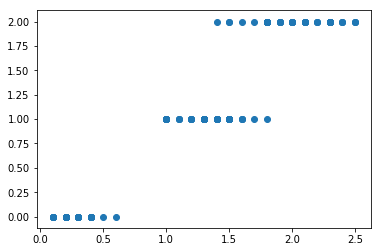

In [10]:
plt.scatter(df['petal width (cm)'], df['target']);

Vamos temporariamente tratar o problema como binário, tentando prever se uma determinada flor é da classe Setosa (classe 0) ou não.

In [11]:
df['setosa'] = df['target'] == 0
df['setosa'].value_counts()

False    100
True      50
Name: setosa, dtype: int64

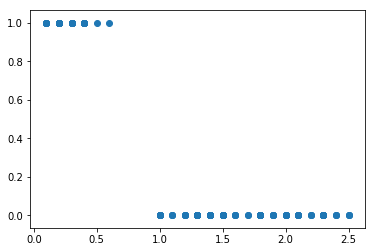

In [12]:
plt.scatter(df['petal width (cm)'], df['setosa']);

In [13]:
regressor = LogisticRegression(multi_class='multinomial', solver='newton-cg')
xtrain, xtest, ytrain, ytest = train_test_split(df['petal width (cm)'].values.reshape(-1, 1),
                                                df['setosa'], test_size=0.5)
regressor.fit(xtrain, ytrain)
print(regressor.coef_, regressor.intercept_)

[[-2.33625664]] [1.78959856]


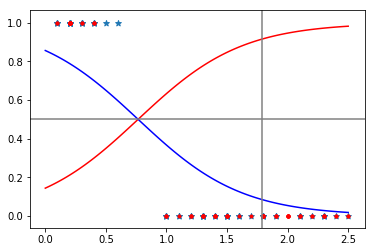

In [14]:
plt.scatter(xtrain, ytrain, marker='*')
plt.scatter(xtest, ytest, c='r', marker='.')

graphx = np.linspace(0, 2.5, 100).reshape(-1, 1)
plt.plot(graphx, regressor.predict_proba(graphx)[:, 0], c='r')
plt.plot(graphx, regressor.predict_proba(graphx)[:, 1], c='b')
plt.axhline(0.5, c='gray')
plt.axvline(regressor.intercept_, c='gray');

In [15]:
accuracy_score(ytest, regressor.predict(xtest))

1.0

## Problemas multinomiais

Existem duas formas principais de trabalhar com dados multinomiais (ou seja, mais de duas classes) em regressão logística. A primeira é a formulação multinomial do problema. O algoritmo padrão para resolver o problema (`solver`) do SK Learn não trata dessa formulação, então é necessário alterar este hiper-parâmetro também.

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

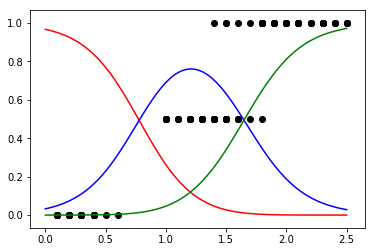

In [16]:
regressor = LogisticRegression(multi_class='multinomial', solver='newton-cg')
regressor.fit(df['petal width (cm)'].values.reshape(-1, 1), df['target'])

x = np.linspace(0, 2.5, 100).reshape(-1, 1)
plt.plot(x, regressor.predict_proba(x)[:, 0], c='r')
plt.plot(x, regressor.predict_proba(x)[:, 1], c='b')
plt.plot(x, regressor.predict_proba(x)[:, 2], c='g')

plt.scatter(df['petal width (cm)'], df['target'] / 2, c='k')

regressor.predict_proba(x).sum(axis=1)

A segunda forma é utilizando o método "Um contra o resto" (_One Versus Rest_, OVR). Nesse método, cada classe é considerada um problema binário de "pertence a classe versus não pertence a classe", como fizemos com a classe Setosa anteriormente.

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

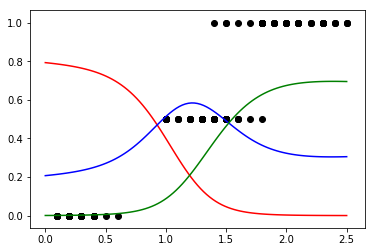

In [17]:
regressor = LogisticRegression(multi_class='ovr', solver='newton-cg')
regressor.fit(df['petal width (cm)'].values.reshape(-1, 1), df['target'])

x = np.linspace(0, 2.5, 100).reshape(-1, 1)
plt.plot(x, regressor.predict_proba(x)[:, 0], c='r')
plt.plot(x, regressor.predict_proba(x)[:, 1], c='b')
plt.plot(x, regressor.predict_proba(x)[:, 2], c='g')

plt.scatter(df['petal width (cm)'], df['target'] / 2, c='k')

regressor.predict_proba(x).sum(axis=1)

Em ambos os casos, as probabilidades são normalizadas de forma que a linha da matriz `predict_proba` sempre tenha soma 1.

Verificar documentação da regressão logística:

In [18]:
?LogisticRegression